In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('http://virtualfif.uaq.mx/diplomado/data/regresion/Multi/S&P500_Stock_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [4]:
df.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [5]:
df.shape

(1000, 3)

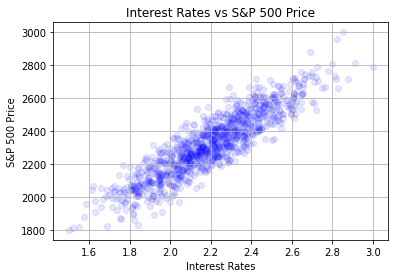

In [6]:
plt.title('Interest Rates vs S&P 500 Price')
plt.scatter(df['Interest Rates'], df['S&P 500 Price'], c = 'blue', alpha = 0.1)
plt.xlabel('Interest Rates')
plt.ylabel('S&P 500 Price')
plt.grid()
plt.show()

C:\Users\Tank3\.conda\envs\ML2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='S&P 500 Price'>

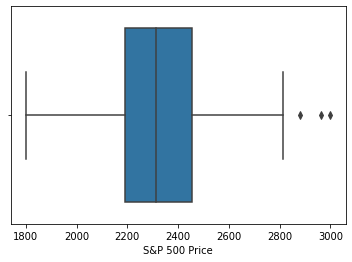

In [7]:
sbn.boxplot(df['S&P 500 Price'])

In [8]:
Q1 = df['S&P 500 Price'].quantile(0.25)
Q2 = df['S&P 500 Price'].quantile(0.50)
Q3 = df['S&P 500 Price'].quantile(0.75)
print(f'{Q1}, {Q2}, {Q3}')

2190.4479014999997, 2312.443024, 2455.7643275


In [9]:
IQR = Q3 - Q1
print(f'Rango intercuartílico: {IQR}')

Rango intercuartílico: 265.3164260000003


In [10]:
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
print(f'{lower_fence}, {upper_fence}')

1792.4732624999992, 2853.7389665000005


In [11]:
o_df = df[(df['S&P 500 Price'] < lower_fence) | (df['S&P 500 Price'] > upper_fence)]
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 360 to 737
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  3 non-null      float64
 1   Employment      3 non-null      float64
 2   S&P 500 Price   3 non-null      float64
dtypes: float64(3)
memory usage: 96.0 bytes


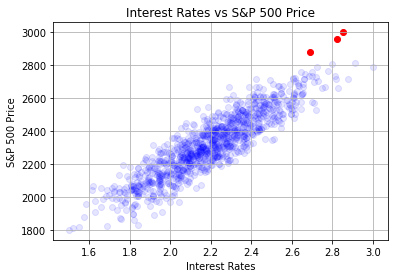

In [12]:
plt.title('Interest Rates vs S&P 500 Price')
plt.scatter(df['Interest Rates'], df['S&P 500 Price'], c = 'blue', alpha = 0.1)
plt.scatter(o_df['Interest Rates'], o_df['S&P 500 Price'], c = 'red', alpha = 1)
plt.xlabel('Interest Rates')
plt.ylabel('S&P 500 Price')
plt.grid()
plt.show()

In [13]:
df = df[(df['S&P 500 Price'] > lower_fence) & (df['S&P 500 Price'] < upper_fence)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  997 non-null    float64
 1   Employment      997 non-null    float64
 2   S&P 500 Price   997 non-null    float64
dtypes: float64(3)
memory usage: 31.2 KB


In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int((X.shape[0]*15)/100), random_state=0)

In [16]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [17]:
modelo.score(X_train, y_train)

0.8946974229904564

In [18]:
modelo.score(X_test, y_test)

0.9211735574000496

In [19]:
y_pred = modelo.predict(X_test)

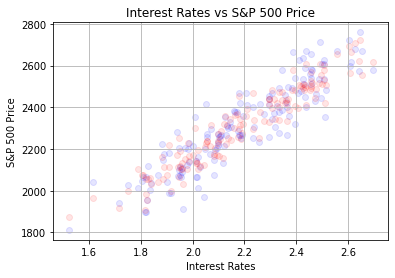

In [20]:
plt.title('Interest Rates vs S&P 500 Price')
plt.scatter(X_test[:,0], y_test, c = 'blue', alpha = 0.1)
plt.scatter(X_test[:,0], y_pred, c = 'red', alpha = 0.1)
plt.xlabel('Interest Rates')
plt.ylabel('S&P 500 Price')
plt.grid()
plt.show()

In [21]:
y_pred = modelo.predict(X_train)

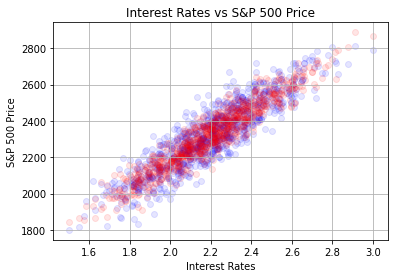

In [22]:
plt.title('Interest Rates vs S&P 500 Price')
plt.scatter(X_train[:,0], y_train, c = 'blue', alpha = 0.1)
plt.scatter(X_train[:,0], y_pred, c = 'red', alpha = 0.1)
plt.xlabel('Interest Rates')
plt.ylabel('S&P 500 Price')
plt.grid()
plt.show()